# Clustering Restaurant Data

In [14]:
pip install seaborn

In [15]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

# Load and Check the Dataset

In [6]:
# Load the original dataset
restaurant_df = pd.read_csv(
    Path("./resources/restaurant_data.csv")
)

restaurant_df

FileNotFoundError: [Errno 2] No such file or directory: 'resources\\restaurant_data.csv'

In [ ]:
# Check the data
restaurant_df.info()

# Standardize the Data

In [ ]:
# Normalize the data, scaling selected columns to a mean of 0 and a standard deviation of 1 
restaurant_df_scaled = StandardScaler().fit_transform(restaurant_df[["Rating", "Seating Capacity", "Average Meal Price",
                                                                     "Marketing Budget", "Social Media Followers",
                                                                     "Chef Experience Years", "Number of Reviews",
                                                                     "Avg Review Length", "Ambience Score", "Service Quality Score",
                                                                     "Weekend Reservations", "Weekday Reservations", "Revenue"]])

restaurant_df_scaled = pd.DataFrame(data = restaurant_df_scaled,
                                    columns = ["Rating", "Seating Capacity", "Average Meal Price",
                                              "Marketing Budget", "Social Media Followers",
                                              "Chef Experience Years", "Number of Reviews",
                                              "Avg Review Length", "Ambience Score", "Service Quality Score",
                                              "Weekend Reservations", "Weekday Reservations", "Revenue"])

restaurant_df_scaled

In [ ]:
# Convert categorical variable into dummy/indicator variables.
dummies_df = pd.get_dummies(restaurant_df[["Location", "Cuisine", "Parking Availability"]])

# Concatenate "restaurant_df_scaled" data and "dummies_df" data
restaurant_df_converted = pd.concat([restaurant_df_scaled, dummies_df], axis = 1)
restaurant_df_converted.to_csv(Path("./exported_resources/restaurant_df_scaled.csv", header = True))
restaurant_df_converted

In [ ]:
# Check the data
restaurant_df_converted.info()

# Reducing the Dimensionality of Data Using PCA (Principal Component Analysis)

In [ ]:
# Reducing the Dimensionality of Data Using PCA
pca = PCA(n_components = 9)
restaurant_pca_df = pca.fit_transform(restaurant_df_converted)
restaurant_pca_df = pd.DataFrame(data = restaurant_pca_df, 
                                columns = ["PCA_1", "PCA_2", "PCA_3", "PCA_4", 
                                           "PCA_5", "PCA_6", "PCA_7", "PCA_8", "PCA_9"])
restaurant_pca_df

In [ ]:
# Check the reduced 9 principal components variance ratio
variance_ratio = sum(pca.explained_variance_ratio_) * 100
print(f"The 24 original features were reduced to 9 principal components, capturing approximately {round(variance_ratio, 2)}% of total variance.")

# Determining the Number of Clusters

In [17]:
import warnings

warnings.filterwarnings("ignore")

# Determine the number of clusters using elbow method
inertia = []
cluster_list = list(range(1, 41))

for clusters in cluster_list:
    k_model = KMeans(n_clusters = clusters, random_state = 1)
    k_model.fit(restaurant_pca_df)
    inertia.append(k_model.inertia_)

elbow = {
    "cluster_num": cluster_list,
    "inertia": inertia
}

# Visualize elbow method
elbow_df = pd.DataFrame(data = elbow)

elbow_df.hvplot.line(
    x = "cluster_num",
    y = "inertia",
    title = "Elbow Method",
    xticks = cluster_list,
    alpha = 0.7,
    color = 'red'
)

NameError: name 'restaurant_pca_df' is not defined

In [ ]:
print("Since the optimal number of clusters is not clearly identifiable, I will rely on the Calinski-Harabasz score for determination.")

In [ ]:
# Determine the number of clusters using Calinski-Harabasz score
scores = []
cluster_list = list(range(2, 41))

for clusters in cluster_list:
    k_model = KMeans(n_clusters = clusters, random_state = 1)
    k_model.fit(restaurant_pca_df)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(restaurant_pca_df, labels)
    scores.append(score)

cluster_scores = {
    "cluster_num": cluster_list,
    "Calinski Harabasz Score": scores
}

# Make a dataframe of Calinski Harabasz Score
scores_df = pd.DataFrame(data = cluster_scores)
scores_df

In [ ]:
# Visualize the Calinski-Harabasz score
plt.figure(figsize = (10, 4))
plt.bar(scores_df["cluster_num"], scores_df["Calinski Harabasz Score"], color = 'blue', alpha = 0.3)
plt.xticks(cluster_list)
plt.title("Calinski Harabasz Score by Cluster Numbers")
plt.xlabel("Cluster Numbers")
plt.ylabel("Calinski Harabasz Score")
plt.tight_layout()

plt.show()

In [ ]:
print("The optimal number of clusters appears to be 2.")

# Segment the Data Using the K-means Algorithm

In [ ]:
# Segment the Data Using the K-means Algorithm
k_model = KMeans(n_clusters = 2, random_state = 1)
k_model.fit(restaurant_pca_df)
cluster = k_model.predict(restaurant_pca_df)

# Create cluster dataframe
cluster_df = pd.DataFrame(data = cluster, columns = ["Cluster"])
cluster_df.to_csv(Path("./exported_resources/restaurant_cluster_label_df.csv"), header = True)
cluster_df

In [ ]:
# Concatenate the "restaurant_pca_df" dataframe and "cluster_df" dataframe
pca_clustered_df = pd.concat([restaurant_pca_df, cluster_df], axis = 1)
pca_clustered_df

In [ ]:
# Concatenate the "restaurant_df_converted" (scaled data) dataframe and "cluster_df" dataframe
restaurant_df_scaled_clustered = pd.concat([restaurant_df_converted, cluster_df], axis = 1)
restaurant_df_scaled_clustered

In [ ]:
# Check the dataframe
restaurant_df_scaled_clustered.info()

# correlation heatmap



In [18]:
df_correlation = pd.read_csv("restaurant_scaled_and_clustered.csv")
df_correlation.head(5)

,cluster_id,cluster,id,rating,seating_capacity,average_meal_price,marketing_budget,social_media_followers,chef_experience_years,number_of_reviews,...,location_rural,location_suburban,cuisine_american,cuisine_french,cuisine_indian,cuisine_italian,cuisine_japanese,cuisine_mexican,parking_availability_no,parking_availability_yes
0,0,0,0,-0.014202,-1.276714,1.819441,-0.544861,-0.686274,0.534421,-1.219380,...,True,False,False,False,False,False,True,False,False,True
1,1,1,1,-1.390099,0.907389,-1.380216,0.656375,0.351622,-0.371987,0.036038,...,False,False,False,False,False,False,False,True,False,True
2,2,0,2,1.189708,-0.701950,0.027437,-0.231400,0.058746,1.440830,1.190445,...,True,False,False,False,False,True,False,False,True,False
3,3,0,3,0.673746,-1.506619,0.254838,-1.124106,-1.126017,0.534421,-1.590955,...,True,False,False,False,False,True,False,False,False,True
4,4,1,4,1.533682,1.597106,1.958951,0.230572,0.213665,-0.190705,-1.605385,...,False,False,False,False,False,False,True,False,True,False


In [19]:
# Compute the correlation matrix
correlation_matrix = df_correlation.corr()

# Display the correlation matrix
print(correlation_matrix)

                          cluster_id   cluster        id    rating  \
cluster_id                  1.000000 -0.020447  1.000000  0.022080   
cluster                    -0.020447  1.000000 -0.020447  0.089441   
id                          1.000000 -0.020447  1.000000  0.022080   
rating                      0.022080  0.089441  0.022080  1.000000   
seating_capacity           -0.013671  0.766723 -0.013671  0.004862   
average_meal_price         -0.018886  0.101225 -0.018886 -0.002265   
marketing_budget           -0.005502  0.658147 -0.005502  0.263448   
social_media_followers     -0.005141  0.648956 -0.005141  0.289559   
chef_experience_years       0.017364  0.029101  0.017364  0.022192   
number_of_reviews           0.008022 -0.004039  0.008022 -0.004238   
avg_review_length           0.001752 -0.031847  0.001752 -0.001272   
ambience_score              0.003621 -0.002076  0.003621  0.007099   
service_quality_score       0.011502 -0.004547  0.011502  0.000887   
weekend_reservations

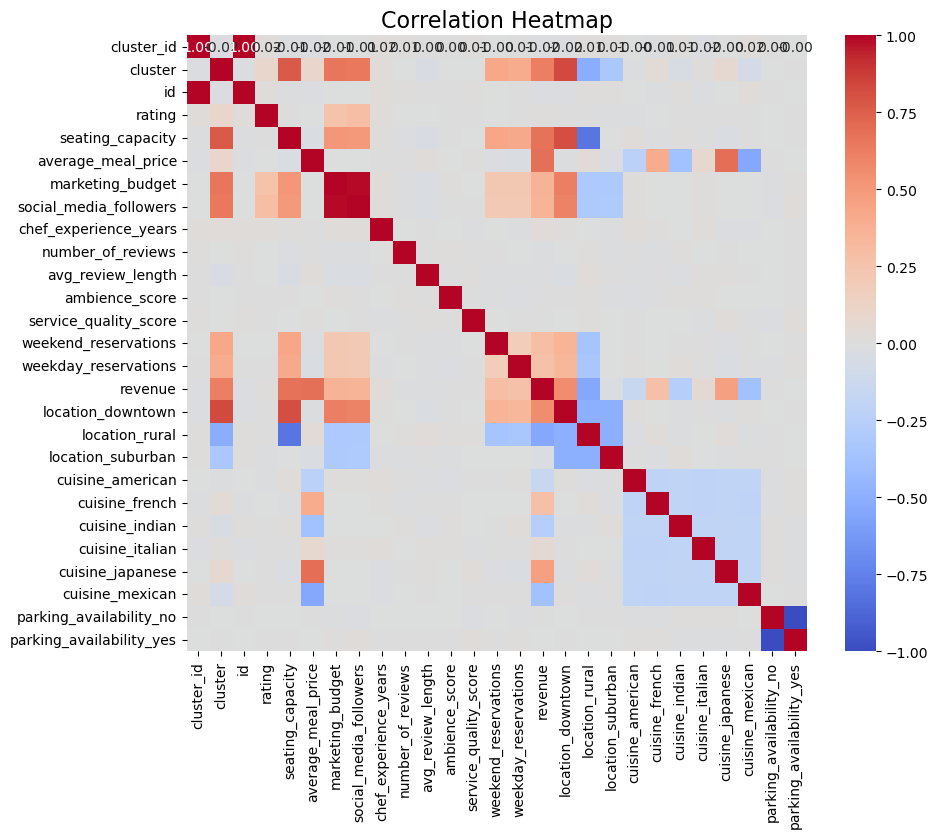

In [20]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the heatmap
plt.show()